In [1]:
%load_ext autoreload
%autoreload 2

1. data Loading 
2. profiling 
3. write your analysis of data 
4. Nan Imputation 
5. handle the normalisation
6, multi collinatery 
7. build a model 
8. save it 
9. model acuurancy 
10 . 10 Test case 



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV , LinearRegression 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np
%matplotlib inline
sns.set()

In [11]:
from logger_class import log

In [12]:
obj_log = log("Linearregression")
lg = obj_log.get_logger() 

In [13]:
df = pd.read_csv("Data .csv")

In [14]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [15]:
profile = ProfileReport(df)

In [16]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile.to_file("Profile_data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [19]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [20]:
# check cat value 
df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']].nunique()

Machine failure    2
TWF                2
HDF                2
PWF                2
OSF                2
RNF                2
dtype: int64

In [21]:
df.isnull().sum() # No NUll value found 

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [22]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [23]:
# droping the uid and product id and UDI
df1= df.drop(["UDI", "Product ID"],axis = 1)

In [24]:
# map the type
df1['Type'] = df1['Type'].map({"L" : 0 , "M" : 1 , "H" : 2 })

In [25]:
df1['Type'].unique()

array([1, 0, 2])

In [26]:
df1

Type  Air temperature [K]  Process temperature [K]  \
0        1                298.1                    308.6   
1        0                298.2                    308.7   
2        0                298.1                    308.5   
3        0                298.2                    308.6   
4        0                298.2                    308.7   
...    ...                  ...                      ...   
9995     1                298.8                    308.4   
9996     2                298.9                    308.4   
9997     1                299.0                    308.6   
9998     2                299.0                    308.7   
9999     1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

In [27]:
# my target column 
y = df1['Air temperature [K]']

In [28]:
#my feature columns 
x = df1.drop(['Air temperature [K]'], axis = 1 )

In [29]:
x

Type  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0        1                    308.6                    1551         42.8   
1        0                    308.7                    1408         46.3   
2        0                    308.5                    1498         49.4   
3        0                    308.6                    1433         39.5   
4        0                    308.7                    1408         40.0   
...    ...                      ...                     ...          ...   
9995     1                    308.4                    1604         29.5   
9996     2                    308.4                    1632         31.8   
9997     1                    308.6                    1645         33.4   
9998     2                    308.7                    1408         48.5   
9999     1                    308.7                    1500         40.2   

      Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0                   0                0    0    0    0    0    0  
1                   3                0    0    0    0    0    0  
2                   5                0    0    0    0    0    0  
3                   7                0    0    0    0    0    0  
4                   9                0    0    0    0    0    0  
...               ...              ...  ...  ...  ...  ...  ...  
9995               14                0    0    0    0    0    0  
9996               17                0    0    0    0    0    0  
9997               22                0    0    0    0    0    0  
9998               25                0    0    0    0    0    0  
9999               30                0    0    0    0    0    0  

[10000 rows x 11 columns]

In [30]:
## we will need to standarise  the variable as the temperature , torque etc is on different scale 

In [31]:
scaler = StandardScaler()

In [32]:
arr = scaler.fit_transform(x)

In [33]:
arr

array([[ 0.74441274, -0.94735989,  0.06818514, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.74530658, -0.879959  , -0.72947151, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.74530658, -1.01476077, -0.22744984, ..., -0.09793424,
        -0.09948362, -0.04363046],
       ...,
       [ 0.74441274, -0.94735989,  0.59251888, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [ 2.23413206, -0.879959  , -0.72947151, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [ 0.74441274, -0.879959  , -0.2162938 , ..., -0.09793424,
        -0.09948362, -0.04363046]])

In [34]:
# profile report after scaling 
df2 = pd.DataFrame(arr, columns=x.columns)


In [ ]:
profile_after.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df2

Type  Process temperature [K]  ...       OSF      RNF
0     0.744413                -0.947360  ... -0.099484 -0.04363
1    -0.745307                -0.879959  ... -0.099484 -0.04363
2    -0.745307                -1.014761  ... -0.099484 -0.04363
3    -0.745307                -0.947360  ... -0.099484 -0.04363
4    -0.745307                -0.879959  ... -0.099484 -0.04363
...        ...                      ...  ...       ...      ...
9995  0.744413                -1.082162  ... -0.099484 -0.04363
9996  2.234132                -1.082162  ... -0.099484 -0.04363
9997  0.744413                -0.947360  ... -0.099484 -0.04363
9998  2.234132                -0.879959  ... -0.099484 -0.04363
9999  0.744413                -0.879959  ... -0.099484 -0.04363

[10000 rows x 11 columns]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif_df = pd.DataFrame()
vif_df["Feature"] = x.columns


In [37]:
vif_df['vif']= [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [38]:
vif_df

Feature        vif
0                      Type   1.003726
1   Process temperature [K]   1.004920
2    Rotational speed [rpm]   5.171728
3               Torque [Nm]   5.236158
4           Tool wear [min]   1.039958
5           Machine failure  11.831609
6                       TWF   2.433879
7                       HDF   4.597163
8                       PWF   3.624287
9                       OSF   3.348866
10                      RNF   1.002016

In [39]:
# here we can see that machine failure is a more than 10 
# so we drop  machine as its is just a represnation of all the othe failure 
df_count =df[df['Machine failure']==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

In [40]:
df_count

TWF  HDF  PWF  OSF  RNF
0  293  224  244  241  338
1   46  115   95   98    1

In [41]:
# droping all the duplicate 
df3 = df2.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1)

In [42]:
df3

Type  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0     0.744413                -0.947360                0.068185     0.282200   
1    -0.745307                -0.879959               -0.729472     0.633308   
2    -0.745307                -1.014761               -0.227450     0.944290   
3    -0.745307                -0.947360               -0.590021    -0.048845   
4    -0.745307                -0.879959               -0.729472     0.001313   
...        ...                      ...                     ...          ...   
9995  0.744413                -1.082162                0.363820    -1.052012   
9996  2.234132                -1.082162                0.520005    -0.821283   
9997  0.744413                -0.947360                0.592519    -0.660777   
9998  2.234132                -0.879959               -0.729472     0.854005   
9999  0.744413                -0.879959               -0.216294     0.021376   

      Tool wear [min]  Machine failure  
0           -1.695984        -0.187322  
1           -1.648852        -0.187322  
2           -1.617430        -0.187322  
3           -1.586009        -0.187322  
4           -1.554588        -0.187322  
...               ...              ...  
9995        -1.476034        -0.187322  
9996        -1.428902        -0.187322  
9997        -1.350349        -0.187322  
9998        -1.303217        -0.187322  
9999        -1.224663        -0.187322  

[10000 rows x 6 columns]

In [43]:
x = df3
y = df1["Air temperature [K]"]

In [44]:
x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
model.coef_

array([ 0.00538365,  1.7392612 , -0.02490871, -0.04571816, -0.00657343,
        0.11161492])

In [48]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model.coef_

In [49]:
cof_df

feature     coef_
0                     Type  0.005384
1  Process temperature [K]  1.739261
2   Rotational speed [rpm] -0.024909
3              Torque [Nm] -0.045718
4          Tool wear [min] -0.006573
5          Machine failure  0.111615

In [50]:
model.score(x_test,y_test)

0.7917416248234623

In [51]:
df3

Type  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0     0.744413                -0.947360                0.068185     0.282200   
1    -0.745307                -0.879959               -0.729472     0.633308   
2    -0.745307                -1.014761               -0.227450     0.944290   
3    -0.745307                -0.947360               -0.590021    -0.048845   
4    -0.745307                -0.879959               -0.729472     0.001313   
...        ...                      ...                     ...          ...   
9995  0.744413                -1.082162                0.363820    -1.052012   
9996  2.234132                -1.082162                0.520005    -0.821283   
9997  0.744413                -0.947360                0.592519    -0.660777   
9998  2.234132                -0.879959               -0.729472     0.854005   
9999  0.744413                -0.879959               -0.216294     0.021376   

      Tool wear [min]  Machine failure  
0           -1.695984        -0.187322  
1           -1.648852        -0.187322  
2           -1.617430        -0.187322  
3           -1.586009        -0.187322  
4           -1.554588        -0.187322  
...               ...              ...  
9995        -1.476034        -0.187322  
9996        -1.428902        -0.187322  
9997        -1.350349        -0.187322  
9998        -1.303217        -0.187322  
9999        -1.224663        -0.187322  

[10000 rows x 6 columns]

In [52]:
pickle.dump(model, open("Sc_model_lr_model.pickle", "wb"))

In [53]:
import statsmodels.api as sm

In [54]:
x = df3
y = df1['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     5587.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         00:13:57   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.755e+04
Df Residuals:                     9993   BIC:                         2.760e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.565      0.572      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.146      0.000       1.729       1.767
Rotational speed [rpm]     -0.0194      0.021     -0.947      0.344      -0.060       0.021
Torque [Nm]                -0.0411      0.021     -1.965      0.049      -0.082   -9.45e-05
Tool wear [min]            -0.0076      0.010     -0.790      0.430      -0.027       0.011
Machine failure             0.1099      0.010     10.780      0.000       0.090       0.130
==============================================================================
Omnibus:                      691.694   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.988
Skew:                          -0.109   Prob(JB):                     4.27e-56
Kurtosis:                       2.249   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     5587.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         00:13:58   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.755e+04
Df Residuals:                     9993   BIC:                         2.760e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.565      0.572      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.146      0.000       1.729       1.767
Rotational speed [rpm]     -0.0194      0.021     -0.947      0.344      -0.060       0.021
Torque [Nm]                -0.0411      0.021     -1.965      0.049      -0.082   -9.45e-05
Tool wear [min]            -0.0076      0.010     -0.790      0.430      -0.027       0.011
Machine failure             0.1099      0.010     10.780      0.000       0.090       0.130
==============================================================================
Omnibus:                      691.694   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.988
Skew:                          -0.109   Prob(JB):                     4.27e-56
Kurtosis:                       2.249   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     5587.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         00:13:59   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.755e+04
Df Residuals:                     9993   BIC:                         2.760e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.565      0.572      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.146      0.000       1.729       1.767
Rotational speed [rpm]     -0.0194      0.021     -0.947      0.344      -0.060       0.021
Torque [Nm]                -0.0411      0.021     -1.965      0.049      -0.082   -9.45e-05
Tool wear [min]            -0.0076      0.010     -0.790      0.430      -0.027       0.011
Machine failure             0.1099      0.010     10.780      0.000       0.090       0.130
==============================================================================
Omnibus:                      691.694   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.988
Skew:                          -0.109   Prob(JB):                     4.27e-56
Kurtosis:                       2.249   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

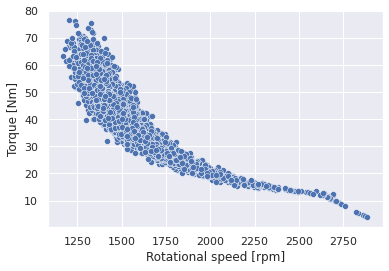

In [57]:
sns.scatterplot(x =df["Rotational speed [rpm]"], y = df['Torque [Nm]'])

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Torque [Nm]'>

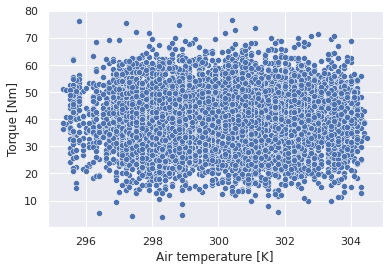

In [58]:
sns.scatterplot(x =df["Air temperature [K]"], y = df['Torque [Nm]'])

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Rotational speed [rpm]'>

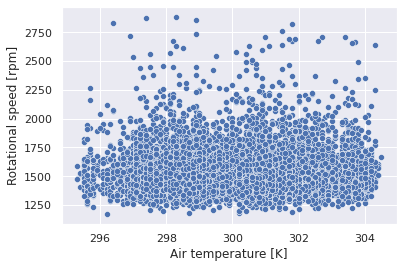

In [59]:
sns.scatterplot(x =df["Air temperature [K]"], y = df["Rotational speed [rpm]"])

In [60]:
df4 = df[df3.columns]
df4['Type'] = df4['Type'].map({"L" : 0 , "M" : 1 , "H" : 2 })

In [61]:
#droping "Rotational speed [rpm]" AS THE P VALUE IS 0.344
X = df4.drop(["Rotational speed [rpm]"], axis = 1)

In [62]:
y = df['Air temperature [K]']

In [63]:
#using standarrd scaler again as we have droped few values after anaylsis 

scaler_after  = StandardScaler()

In [64]:
pickle.dump(scaler_after, open("Scaler_after.pickle", "wb"))

In [65]:
arr = scaler_after.fit_transform(X)

In [66]:
df4 = pd.DataFrame(arr,columns = X.columns)

In [67]:
model_after = LinearRegression()

In [68]:
x= df4
y= df["Air temperature [K]"]

x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

In [69]:
model_after.fit(x_train,y_train)

LinearRegression()

In [70]:
model_after.coef_

array([ 0.00547166,  1.73929732, -0.02355665, -0.00624807,  0.10838571])

In [71]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model_after.coef_
cof_df

feature     coef_
0                     Type  0.005472
1  Process temperature [K]  1.739297
2              Torque [Nm] -0.023557
3          Tool wear [min] -0.006248
4          Machine failure  0.108386

In [72]:
pickle.dump(model_after, open("model_after_model.pickle", "wb"))

In [73]:
# using stats model 
x = df4
y = df['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     6704.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         00:14:18   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.754e+04
Df Residuals:                     9994   BIC:                         2.759e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.561      0.575      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.145      0.000       1.729       1.767
Torque [Nm]                -0.0236      0.010     -2.410      0.016      -0.043      -0.004
Tool wear [min]            -0.0073      0.010     -0.757      0.449      -0.026       0.012
Machine failure             0.1074      0.010     10.911      0.000       0.088       0.127
==============================================================================
Omnibus:                      691.848   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.958
Skew:                          -0.109   Prob(JB):                     4.33e-56
Kurtosis:                       2.249   Cond. No.                         1.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
x = df4.drop(["Tool wear [min]","Type" ], axis = 1)
y = df['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                 1.117e+04
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         00:14:19   Log-Likelihood:                -13767.
No. Observations:                10000   AIC:                         2.754e+04
Df Residuals:                     9996   BIC:                         2.757e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Process temperature [K]     1.7482      0.010    182.172      0.000       1.729       1.767
Torque [Nm]                -0.0234      0.010     -2.395      0.017      -0.043      -0.004
Machine failure             0.1068      0.010     10.921      0.000       0.088       0.126
==============================================================================
Omnibus:                      692.742   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.272
Skew:                          -0.109   Prob(JB):                     3.70e-56
Kurtosis:                       2.248   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""